In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys

sys.path.append('../model_generator')
sys.path.append('../patient_sample_generator')
sys.path.append('../ebm')

from model_generator.model_factory import ModelFactory
from patient_sample_generator.sample_generator import SampleGenerator
from ebm.ebm_transformer import EBMModel

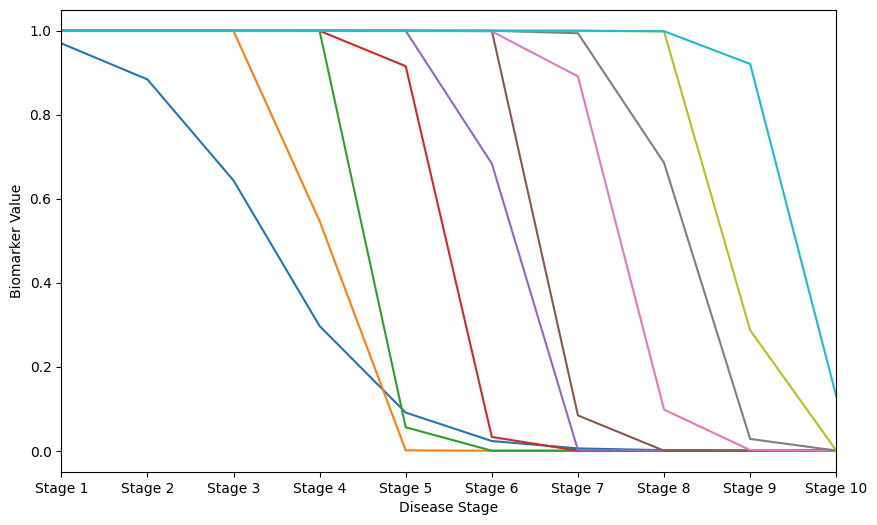

(10, 10)


In [3]:
# Example parameters for the sigmoid model
biomarker_params = {
    0: {'s': 0.1, 'c': 1.0},
    1: {'s': 0.5, 'c': 10.0},
    2: {'s': 0.7, 'c': 20.0},
    3: {'s': 0.4, 'c': 30.0},
    4: {'s': 0.5, 'c': 40.0},
    5: {'s': 0.8, 'c': 50.0},
    6: {'s': 0.3, 'c': 60.0},
    7: {'s': 0.3, 'c': 70.0},
    8: {'s': 0.5, 'c': 80.0},
    9: {'s': 0.3, 'c': 90.0}
}

params = {
    'n_stages': 10,
    'biomarker_params': biomarker_params,
    'start_time': -50,
    'end_time': 75,
    'steps': 1000,
    'staging': 'inset',
    'flip_v': True,
    'flip_h': False,
    'convergence_threshold': 1e-4
}

model = ModelFactory.create_model('sigmoid', **params)
model.fit()
model.plot()
stage_values = model.transform(X=None) # only works when X is explicity defined as None!
print(stage_values.shape)

# for stage in np.arange(stage_values.shape[0]):
#     plt.plot(stage_values[stage])


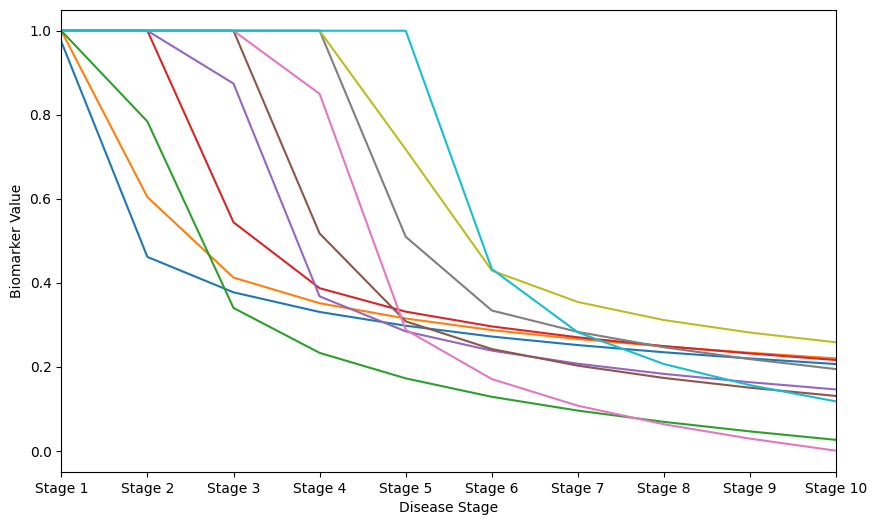

(10, 10)


In [1]:
params = {
    'n_stages': 10,
    'l1_mean': 5.0,
    'l2_mean': 5.0,
    'gamma_mean': 0.9,
    'eta_mean': 0.3,
    'k_ij_value': 0.6,
    'random_state': 10,
    'start_time': 0,
    'end_time': 150,
    'steps': 200,
    'staging': 'whole',
    'matrix_type': 'Tridiagonal',
    'convergence_threshold': 1e-4,
    'flip_v': True
}

model = ModelFactory.create_model('acp', **params)
model.fit()
prior = model.get_connectivity_matrix()
model.plot()
stage_values = model.transform(X=None) 
print(stage_values.shape)

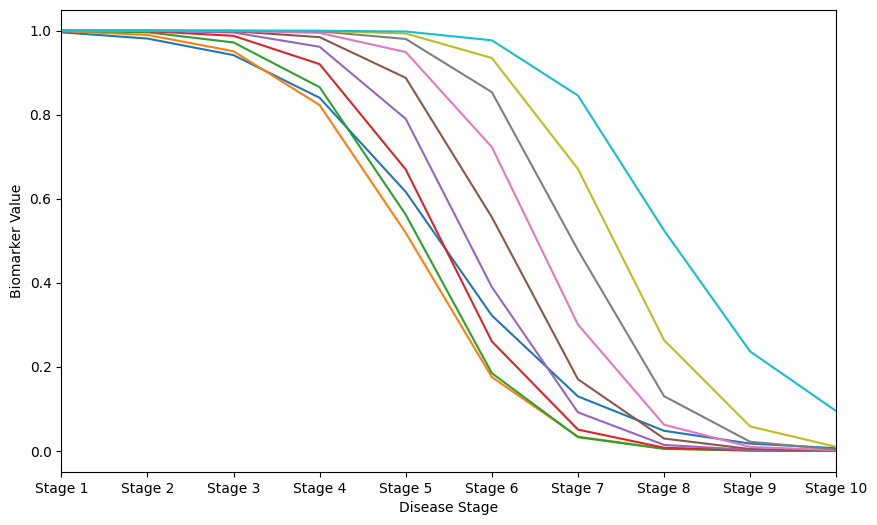

(10, 10)


In [3]:
# Define parameters for the Logistic ODE model
params = {
    'n_stages': 10,  # Number of biomarkers
    'step': 0.1,
    'n_steps': 100,
    'start_time': 0,
    'end_time': 100,
    'steps': 100,
    'connectivity_matrix_type': 'random_connectivity',  # Connectivity matrix type
    'convergence_threshold': 1e-4,
    'flip_v': True
}

model = ModelFactory.create_model('logistic', **params)
model.fit()
# model.plot()
stage_values = model.transform(X=None) # only works when X is explicity defined as None!
print(stage_values.shape)

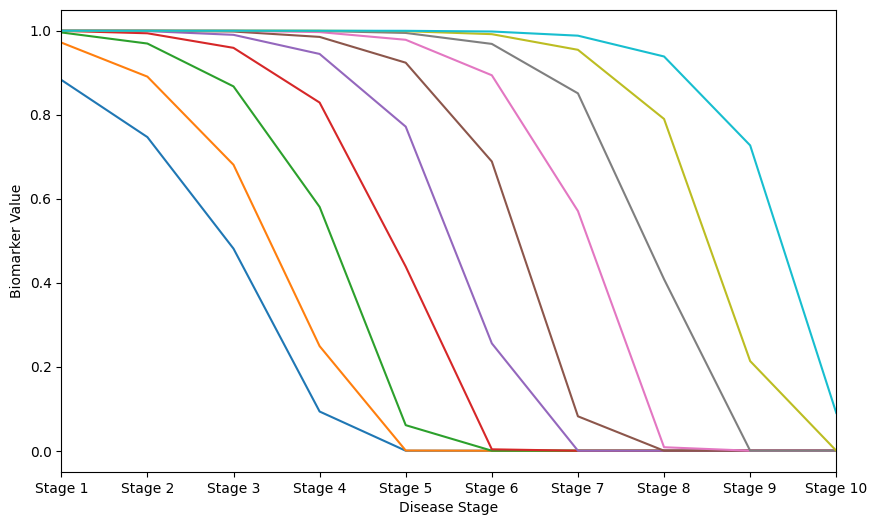

(10, 10)


In [7]:
params = {
    'n_stages': 10,
    'coeff': 0.55e-1, 
    'start_time': 0,
    'end_time': 100,
    'steps': 100,
    'convergence_threshold': 1e-4
}

model = ModelFactory.create_model('transition', **params)
model.fit()
prior = model.get_connectivity_matrix()
model.plot()
stage_values = model.transform(X=None) # only works when X is explicity defined as None!
print(stage_values.shape)
